In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [3]:
def ImportData():
    print('Loading Data...')
    raw_df = pd.read_csv('./Raw_Data_28042020.csv')
    
    print('\nRows: '+str(raw_df.shape[0])+'\nColumns: '+str(raw_df.shape[1]))
    return raw_df

In [4]:
def FeatureEngineeringColumn(df,col):
    df['Hospitalized'] = np.where(df['Current Status']=='Hospitalized',1,0)
    df['Recovered'] = np.where(df['Current Status']=='Recovered',1,0)
    df['Deceased'] = np.where(df['Current Status']=='Deceased',1,0)
    
    df_grpd = df.groupby(['Date Announced',col]).agg({'Hospitalized': 'sum', 'Recovered':'sum', 'Deceased':'sum'}).reset_index()
    df_x = df_grpd.copy()
    df_grpd['Date Announced'] = pd.to_datetime(df_grpd['Date Announced'],format='%d/%m/%Y')
    df_grpd.sort_values(by='Date Announced',inplace=True)
    
    return df_grpd

In [5]:
def ChooseColumn(df,col,val):
    df = df[df[col]==val]
    
    return df

In [6]:
def AccumulatorNormalised(df_grpd):
    df_grpd['Hospitalized_c'] = None
    h=0
    a=0
    for i in range(0,len(df_grpd['Hospitalized'])):
        a = df_grpd.iloc[i]['Hospitalized']
        h=h+a
        df_grpd['Hospitalized_c'].iloc[i] = h

    df_grpd['Recovered_c'] = None
    r=0
    a=0
    for i in range(0,len(df_grpd['Recovered'])):
        a = df_grpd.iloc[i]['Recovered']
        r=r+a
        df_grpd['Recovered_c'].iloc[i] = r


    df_grpd['Deceased_c'] = None
    d=0
    a=0
    for i in range(0,len(df_grpd['Deceased'])):
        a = df_grpd.iloc[i]['Deceased']
        d=d+a
        df_grpd['Deceased_c'].iloc[i] = d
        
    return df_grpd, h, r, d

In [28]:
def plot1(dg,col1,col2,col3,title):
    fig,ax = plt.subplots(1,3,figsize=(15,8),sharey=True)
    sns.barplot(dg['Gender'],dg[col1],ax=ax[0])
    sns.barplot(dg['Gender'],dg[col2],ax=ax[1])
    sns.barplot(dg['Gender'],dg[col3],ax=ax[2])
    ax[0].yaxis.grid(which="major")
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    for p in ax[0].patches:
        ax[0].annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')


    ax[1].yaxis.grid(which="major")
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    for p in ax[1].patches:
        ax[1].annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')


    ax[2].yaxis.grid(which="major")
    ax[2].spines['top'].set_visible(False)
    ax[2].spines['right'].set_visible(False)
    for p in ax[2].patches:
        ax[2].annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')

    fig.suptitle(title, fontsize=16)
    plt.show()

In [8]:
def plot2(df_slt,state,yscl):
    figure = plt.subplots(1,1,figsize=(15,5))
    sns.lineplot('Date Announced','Hospitalized_c',data=df_slt,marker='o')
    sns.lineplot('Date Announced','Recovered_c',data=df_slt,marker='o')
    sns.lineplot('Date Announced','Deceased_c',data=df_slt,marker='o')
    plt.legend(['Hospitalised','Recovered','Deceased'])
    plt.ylabel('# Cases')
    plt.xlabel('Date')
    plt.yscale(yscl)
    plt.title(state)
    plt.grid()
    plt.show()

In [64]:
def plot3(dg,title,normalise=False):
    if normalise:
        figure = plt.subplots(1,1,figsize=(15,5))
        sns.lineplot('Age Group','Hospitalized_Norm',data=dg,marker='o')
        sns.lineplot('Age Group','Recovered_Norm',data=dg,marker='o')
        sns.lineplot('Age Group','Deceased_Norm',data=dg,marker='o')
        plt.legend(['Hospitalised_n','Recovered_n','Deceased_n'])
        plt.ylabel('% of Cases')
        plt.xlabel('Age Group')
        plt.title(title)
        plt.grid()
        plt.show()
        
    else:
        figure = plt.subplots(1,1,figsize=(15,5))
        sns.lineplot('Age Group','Hospitalized',data=dg,marker='o')
        sns.lineplot('Age Group','Recovered',data=dg,marker='o')
        sns.lineplot('Age Group','Deceased',data=dg,marker='o')
        plt.legend(['Hospitalised','Recovered','Deceased'])
        plt.ylabel('# of Cases')
        plt.xlabel('Age Group')
        plt.title(title)
        plt.grid()
        plt.show()    

# Gender

In [9]:
df = ImportData()

Loading Data...

Rows: 27891
Columns: 20


<B> Note: </B> The data used in this study is crowd sourced data. Even though the numbers matches up mostly to the official records there are certain discrepencies. <br> A majority of the Gender and Age cells are Null. I am assuming the data with values to be a Simple Random Sample (SRS) of the entire population. In this study, I am considering the population to be the people affected (Hospitalised/Recovered/Deceased).   

In [10]:
x = round((df[df['Gender'].isnull()==False].shape[0]/df.shape[0] * 100),3)
print('{}% of Gender data is available.'.format(x))

19.049% of Gender data is available.


In [11]:
print('Null Data\n'+'-'*50)
for i in df[df['Detected State'].isnull()==False]['Detected State'].unique():
    temp = df[df['Detected State']==i]
    x = round((temp[temp['Gender'].isnull()==True].shape[0]/temp.shape[0] * 100),3)
    print(i+' \t\t\t\t{}%'.format(x))

Null Data
--------------------------------------------------
Kerala 				62.687%
Delhi 				98.492%
Telangana 				96.603%
Rajasthan 				98.719%
Haryana 				95.27%
Uttar Pradesh 				96.743%
Ladakh 				70.0%
Tamil Nadu 				46.26%
Jammu and Kashmir 				97.514%
Karnataka 				0.398%
Maharashtra 				99.033%
Punjab 				84.472%
Andhra Pradesh 				61.987%
Uttarakhand 				90.196%
Odisha 				30.097%
Puducherry 				50.0%
West Bengal 				96.236%
Chandigarh 				13.889%
Chhattisgarh 				81.081%
Gujarat 				26.234%
Himachal Pradesh 				92.5%
Madhya Pradesh 				98.804%
Bihar 				9.386%
Manipur 				50.0%
Mizoram 				0.0%
Goa 				14.286%
Andaman and Nicobar Islands 				84.848%
Jharkhand 				92.683%
Assam 				94.444%
Arunachal Pradesh 				100.0%
Tripura 				50.0%
Meghalaya 				91.667%


In [12]:
print(str(len(df[df['Gender'].isnull()==False]['Detected State'].unique()))+' States & UT are having gender data.')

31 States & UT are having gender data.


Therefore, we can say that all the States and UTs are having some gender data and the sample is not biased towards any states.

In [13]:
df = df[df['Gender'].isnull()==False]
df.shape

(5313, 20)

### What is the share of Male and Female in the confirmed cases?

In [16]:
df['Hospitalized'] = np.where(df['Current Status']=='Hospitalized',1,0)
df['Recovered'] = np.where(df['Current Status']=='Recovered',1,0)
df['Deceased'] = np.where(df['Current Status']=='Deceased',1,0)

dg = df.groupby('Gender').agg({'Deceased':'sum','Hospitalized':'sum','Recovered':'sum'}).reset_index()
dg

,Gender,Deceased,Hospitalized,Recovered
0,F,14,1713,39
1,M,30,3433,84


In [17]:
total = dg.Deceased.sum() + dg.Hospitalized.sum() + dg.Recovered.sum()
dg['Deceased_n'] = dg.Deceased/total
dg['Hospitalized_n'] = dg.Hospitalized/total
dg['Recovered_n'] = dg.Recovered/total
dg

,Gender,Deceased,Hospitalized,Recovered,Deceased_n,Hospitalized_n,Recovered_n
0,F,14,1713,39,0.002635,0.322417,0.00734
1,M,30,3433,84,0.005647,0.646151,0.01581


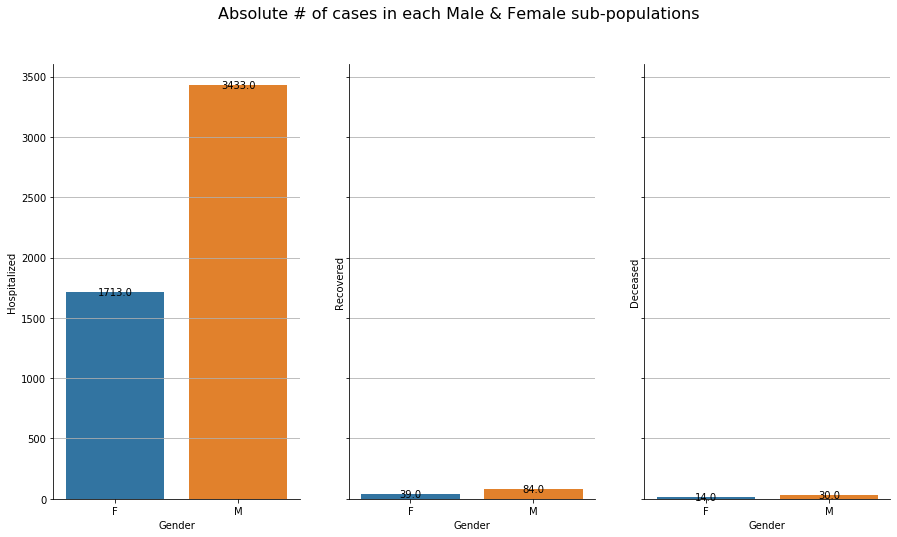

In [29]:
plot1(dg,'Hospitalized','Recovered','Deceased','Absolute # of cases in each Male & Female sub-populations')

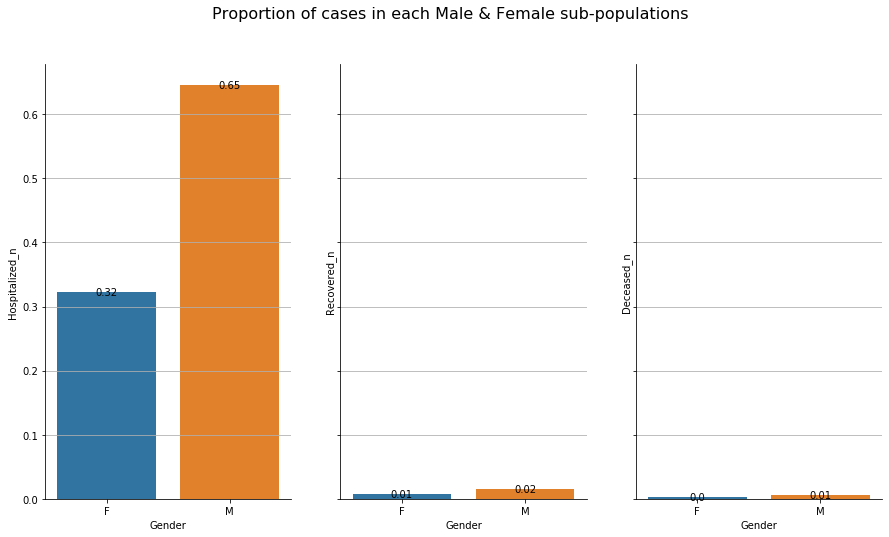

In [30]:
plot1(dg,'Hospitalized_n','Recovered_n','Deceased_n','Proportion of cases in each Male & Female sub-populations')

### Growth in Different Genders

Number of Confirmed Cases -vs- Dates for Male and Female sub-populations
Enter y-scale (linear/log): linear


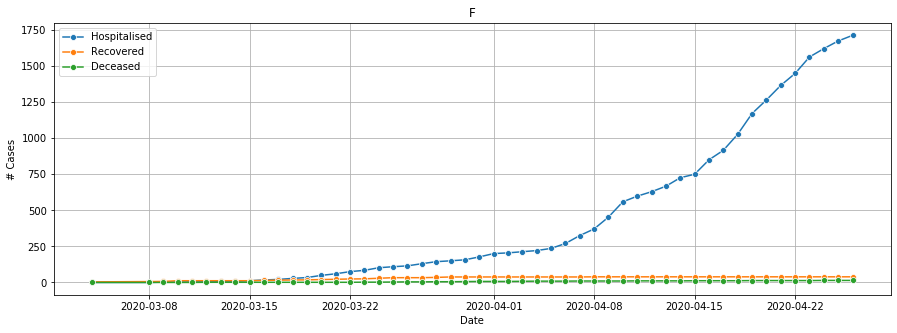

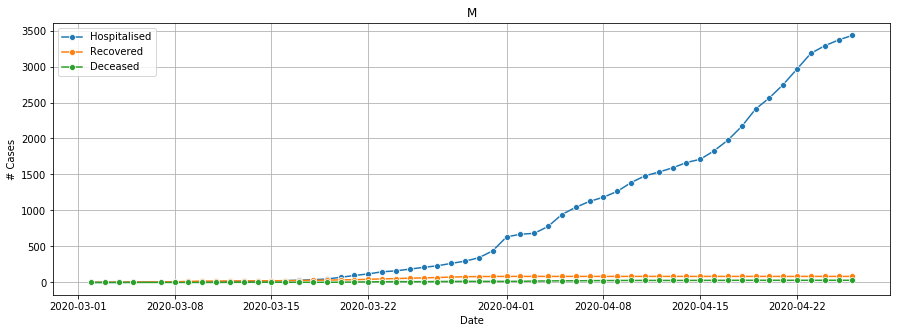

In [33]:
df_grpd = FeatureEngineeringColumn(df,'Gender')
print('Number of Confirmed Cases -vs- Dates for Male and Female sub-populations')
yscl = input('Enter y-scale (linear/log): ')

for i in df_grpd['Gender'].unique():
    df_slt = ChooseColumn(df_grpd,'Gender',i)
    df_slt, h, r, d = AccumulatorNormalised(df_slt)
    
    if(i=='F'):
        df_slt = df_slt[1:]
    
    plot2(df_slt,i,yscl)

<B>Observation:</B><br>
The spread in the two sub-populations is visually equal to one another.

#### Statistical Inference

<B>Question: </B> In the reported Male & Female patients infected by COVID-19 virus in India, what is the proportion of the total infected patients?	<br>

<I>Confidence Interval:</I>

In [18]:
dg

,Gender,Deceased,Hospitalized,Recovered,Deceased_n,Hospitalized_n,Recovered_n
0,F,14,1713,39,0.002635,0.322417,0.00734
1,M,30,3433,84,0.005647,0.646151,0.01581


In [19]:
p = dg[dg['Gender']=='F']['Hospitalized_n'][0]
n = dg.Deceased.sum() + dg.Hospitalized.sum() + dg.Recovered.sum()
se = np.sqrt(p * (1 - p) / n)

lcb = p - 1.96 *se 
ucb = p + 1.96 * se

print('Proportion: {}\nSample Size: {}\nStandard Error: {}\nConfidence Interval: ({},{})'.format(p,n,se,lcb,ucb))

Proportion: 0.32241671372106157
Sample Size: 5313
Standard Error: 0.006412394131736514
Confidence Interval: (0.309848421222858,0.33498500621926514)


In [20]:
p = dg[dg['Gender']=='M']['Hospitalized_n'][1]
n = dg.Deceased.sum() + dg.Hospitalized.sum() + dg.Recovered.sum()
se = np.sqrt(p * (1 - p) / n)

lcb = p - 1.96 *se 
ucb = p + 1.96 * se

print('Proportion: {}\nSample Size: {}\nStandard Error: {}\nConfidence Interval: ({},{})'.format(p,n,se,lcb,ucb))

Proportion: 0.6461509504987766
Sample Size: 5313
Standard Error: 0.0065600341841871935
Confidence Interval: (0.6332932834977697,0.6590086174997835)


<B> Inference: </B><br> With 95% confidence, we can conclude from a sample of 5313 affected people that the population proportion of Female ranges from (30.98% to 33.49%) and that of Male ranges from (63.33% to 65.90%) in the overall population of confirmed patients.

<B>Question: </B> In the reported Male & Female patients infected by COVID-19 virus in India, Is there any difference in the proportion of the total <B>recovering</B> patients?		<br>

<I>Confidence Interval</I>

In [34]:
dz = df.groupby(df.Gender).agg({"Current Status": [lambda x: np.mean(x=="Recovered"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

,Proportion,Total_n
Gender,,
F,0.022084,1766
M,0.023682,3547


In [35]:
p = dz.Proportion.F
n = dz.Total_n.F
se_female = np.sqrt(p * (1 - p) / n)

p = dz.Proportion.M
n = dz.Total_n.M
se_male = np.sqrt(p * (1 - p) / n)

se_diff = np.sqrt(se_female**2 + se_male**2)

m = dz.Proportion.M
f = dz.Proportion.F
d = m-f 
lcb = d - 1.96*se_diff
ucb = d + 1.96*se_diff

print('Sample Proportion of Male Recovery: {}%'.format(round(m*100,3)))
print('Sample Proportion of Female Recovery: {}%'.format(round(f*100,3)))
print('Sample Difference: {}%'.format(round(d*100,3)))
print('Standard Error: {}'.format(round(se_diff*100,3)))
print('Confidence Interval of difference in Male&Female proportion of patients getting recovered: \n({}%, {}%)'.format(round(lcb*100,3),round(ucb*100,3)))

Sample Proportion of Male Recovery: 2.368%
Sample Proportion of Female Recovery: 2.208%
Sample Difference: 0.16%
Standard Error: 0.433
Confidence Interval of difference in Male&Female proportion of patients getting recovered: 
(-0.689%, 1.008%)


<B> Inference: </B><br>
Considering all parameters same if we repeat this statistics procedure we can conclude that 95 times out of 100 times, the difference in the proportion of recovery in Male and Female ranges between (-0.689 to 1.008) which is also inclusive of Zero suggesting there might be no difference in the propotion.

<I> Hypothesis Testing </I>

<B>H<sub>0</sub>:</B> p<sub>m</sub>-p<sub>f</sub> = 0 <br>
<B>H<sub>a</sub>:</B> p<sub>m</sub>-p<sub>f</sub> &ne; 0 <br><br>
&emsp;&emsp;&emsp;&emsp;&emsp; where,  p<sub>m</sub> = Proportion of Male recovering <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; p<sub>f</sub> = Proportion of Female recovering

In [36]:
p_hat = df[df['Current Status']=='Recovered'].shape[0]/df.shape[0]
p_hat

n1 = df[df['Gender']=='M'].shape[0]
n2 = df[df['Gender']=='F'].shape[0]

print(n1*p_hat,n1*(1-p_hat),n2*p_hat,n2*(1-p_hat))


82.11575381140598 3464.8842461885943 40.88424618859401 1725.115753811406


Since, all these samples are greater than 10 we can invoke CLT and assume normality

In [37]:
import statsmodels.api as sm

dx_females = df.loc[df.Gender=="F", 'Current Status'].replace({"Recovered": 1, "Hospitalized": 0, "Deceased":0})
dx_males = df.loc[df.Gender=="M", 'Current Status'].replace({"Recovered": 1, "Hospitalized": 0, "Deceased":0})
t_stat, p_value, dof = sm.stats.ttest_ind(dx_females, dx_males) # prints test statistic, p-value, degrees of freedom`

In [38]:
print('t statistics: {}'.format(t_stat))
print('p-value: {}'.format(p_value))

t statistics: -0.3648454008216443
p-value: 0.7152413394642001


<B> Inference: </B><br>
Taking a significance level of &alpha; = 0.05, we see that p-value > &alpha;. Therefore, we do not have sufficient evidence to reject the <B>H<sub>0</sub>:</B> p<sub>m</sub>-p<sub>f</sub> = 0 <br> 
We cannot reject the hypothesis that there is no difference in the proportion of recovery in Male and Female patients.

<B>Question: </B> In the reported Male & Female patients infected by COVID-19 virus in India, Is there any difference in the proportion of the total patients who are <B>dying</B>?		<br>

<I>Confidence Interval</I>

In [39]:
dz = df.groupby(df.Gender).agg({"Current Status": [lambda x: np.mean(x=="Deceased"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz

,Proportion,Total_n
Gender,,
F,0.007928,1766
M,0.008458,3547


In [40]:
p = dz.Proportion.F
n = dz.Total_n.F
se_female = np.sqrt(p * (1 - p) / n)

p = dz.Proportion.M
n = dz.Total_n.M
se_male = np.sqrt(p * (1 - p) / n)

se_diff = np.sqrt(se_female**2 + se_male**2)

m = dz.Proportion.M
f = dz.Proportion.F
d = m-f 
lcb = d - 1.96*se_diff
ucb = d + 1.96*se_diff

print('Sample Proportion of Male Recovery: {}%'.format(round(m*100,3)))
print('Sample Proportion of Female Recovery: {}%'.format(round(f*100,3)))
print('Sample Difference: {}%'.format(round(d*100,3)))
print('Standard Error: {}'.format(round(se_diff*100,3)))
print('Confidence Interval of difference in Male&Female proportion of patients getting Losing Life: \n({}%, {}%)'.format(round(lcb*100,3),round(ucb*100,3)))

Sample Proportion of Male Recovery: 0.846%
Sample Proportion of Female Recovery: 0.793%
Sample Difference: 0.053%
Standard Error: 0.261
Confidence Interval of difference in Male&Female proportion of patients getting Losing Life: 
(-0.459%, 0.565%)


<B> Inference: </B><br>
Considering all parameters same if we repeat this statistics procedure we can conclude that 95 times out of 100 times, the difference in the proportion of deaths in Male and Female ranges between (-0.459% to 0.565%) which is also inclusive of Zero suggesting there might be no difference in the propotion.

<I> Hypothesis Testing </I>

<B>H<sub>0</sub>:</B> p<sub>m</sub>-p<sub>f</sub> = 0 <br>
<B>H<sub>a</sub>:</B> p<sub>m</sub>-p<sub>f</sub> &ne; 0 <br><br>
&emsp;&emsp;&emsp;&emsp;&emsp; where,  p<sub>m</sub> = Proportion of Male patients losing life <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; p<sub>f</sub> = Proportion of Female patients losing life

In [41]:
p_hat = df[df['Current Status']=='Deceased'].shape[0]/df.shape[0]
p_hat

n1 = df[df['Gender']=='M'].shape[0]
n2 = df[df['Gender']=='F'].shape[0]

print(n1*p_hat,n1*(1-p_hat),n2*p_hat,n2*(1-p_hat))


29.374741200828158 3517.6252587991717 14.625258799171844 1751.374741200828


Since, all these samples are greater than 10 we can invoke CLT and assume normality

In [42]:
import statsmodels.api as sm

dx_females = df.loc[df.Gender=="F", 'Current Status'].replace({"Recovered": 0, "Hospitalized": 0, "Deceased":1})
dx_males = df.loc[df.Gender=="M", 'Current Status'].replace({"Recovered": 0, "Hospitalized": 0, "Deceased":1})
t_stat, p_value, dof = sm.stats.ttest_ind(dx_females, dx_males) # prints test statistic, p-value, degrees of freedom`

In [43]:
print('t statistics: {}'.format(t_stat))
print('p-value: {}'.format(p_value))

t statistics: -0.20089681317178099
p-value: 0.840786952459463


<B> Inference: </B><br>
Taking a significance level of &alpha; = 0.05, we see that p-value > &alpha;. Therefore, we do not have sufficient evidence to reject the <B>H<sub>0</sub>:</B> p<sub>m</sub>-p<sub>f</sub> = 0 <br> 
We cannot reject the hypothesis that there is no difference in the proportion of deaths in Male and Female patients.

# Age Group

In [44]:
df = ImportData()

Loading Data...

Rows: 27891
Columns: 20


In [45]:
df['Age Bracket'] = np.where(df['Age Bracket']=='28-35','32',df['Age Bracket'])
df['Age'] = df['Age Bracket'].astype('float')

Let's take a quick look at our data if it has sufficient samples, does or does not suffer from any biases and if it is normally distributed or not

In [51]:
x = round((df[df['Age'].isnull()==False].shape[0]/df.shape[0] * 100),3)
print('{}% of Age data is available.'.format(x))
n = df[df['Age'].isnull()==False].shape[0]
print('{} records are present.'.format(n))

8.411% of Age data is available.
2346 records are present.


In [47]:
print('Null Data\n'+'-'*50)
for i in df[df['Detected State'].isnull()==False]['Detected State'].unique():
    temp = df[df['Detected State']==i]
    x = round((temp[temp['Age'].isnull()==True].shape[0]/temp.shape[0] * 100),3)
    print(i+' \t\t\t\t{}%'.format(x))

Null Data
--------------------------------------------------
Kerala 				60.128%
Delhi 				99.554%
Telangana 				96.703%
Rajasthan 				98.902%
Haryana 				92.23%
Uttar Pradesh 				97.597%
Ladakh 				85.0%
Tamil Nadu 				77.719%
Jammu and Kashmir 				97.514%
Karnataka 				0.398%
Maharashtra 				99.256%
Punjab 				88.199%
Andhra Pradesh 				62.261%
Uttarakhand 				92.157%
Odisha 				31.068%
Puducherry 				25.0%
West Bengal 				95.745%
Chandigarh 				41.667%
Chhattisgarh 				83.784%
Gujarat 				95.547%
Himachal Pradesh 				92.5%
Madhya Pradesh 				98.995%
Bihar 				9.386%
Manipur 				50.0%
Mizoram 				0.0%
Goa 				14.286%
Andaman and Nicobar Islands 				90.909%
Jharkhand 				97.561%
Assam 				97.222%
Arunachal Pradesh 				100.0%
Tripura 				50.0%
Meghalaya 				91.667%


In [48]:
print(str(len(df[df['Age'].isnull()==False]['Detected State'].unique()))+' States & UT are having age data.')

31 States & UT are having age data.


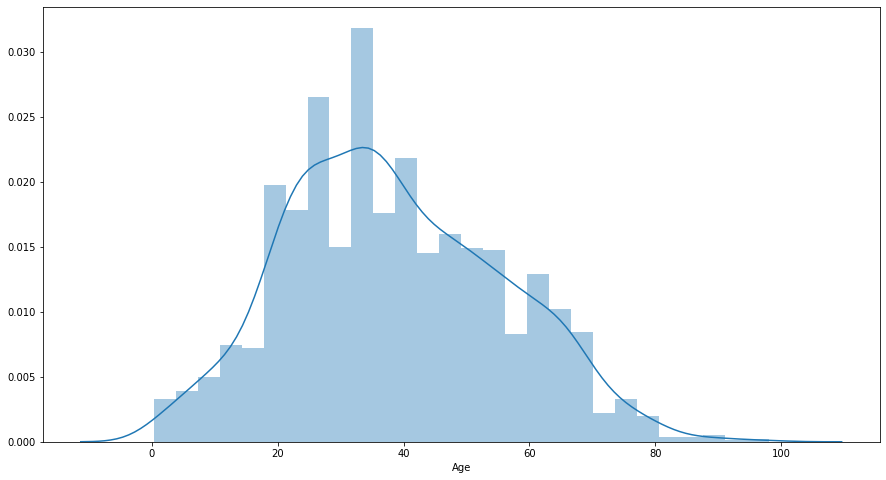

In [188]:
figure,ax = plt.subplots(1,1,figsize=(15,8))
sns.distplot(df['Age'].dropna())
plt.show()

<B> Observation:</B><br>
The distribution of Age is slightly skewed to the right, but considering the number of sample we can assume normality and invoke CLT.

<B>Conclusion:</B>
1. Not biased by missing out on specific Indian State.
2. Okay to assume normally distributed.
3. Sufficient Sample Size.

In [52]:
df['Hospitalized'] = np.where(df['Current Status']=='Hospitalized',1,0)
df['Recovered'] = np.where(df['Current Status']=='Recovered',1,0)
df['Deceased'] = np.where(df['Current Status']=='Deceased',1,0)

In [53]:
a = df[df['Hospitalized']==1].Age.mean()
b = df[df['Deceased']==1].Age.mean()
c = df[df['Recovered']==1].Age.mean()

print('---Mean Age--- \nHospitalised: {}\nRecovered: {}\nDeceased: {}'.format(a,c,b))

---Mean Age--- 
Hospitalised: 37.91285583103765
Recovered: 40.733870967741936
Deceased: 60.06818181818182


In [54]:
a = df[df['Hospitalized']==1].Age.median()
b = df[df['Deceased']==1].Age.median()
c = df[df['Recovered']==1].Age.median()

print('---Median Age--- \nHospitalised: {}\nRecovered: {}\nDeceased: {}'.format(a,c,b))

---Median Age--- 
Hospitalised: 36.0
Recovered: 38.0
Deceased: 65.0


Mean > Median because there are ages with slightly higher values. 

In [55]:
df['Age Group'] = pd.cut(df['Age'],[0,18, 30, 40, 50, 60, 70, 80])
df.drop(columns=['Age Bracket'],inplace=True)

In [56]:
dg = df.groupby('Age Group').agg({'Deceased':'sum','Hospitalized':'sum','Recovered':'sum'}).reset_index()
dg

,Age Group,Deceased,Hospitalized,Recovered
0,"(0, 18]",1,244,8
1,"(18, 30]",1,550,34
2,"(30, 40]",2,514,25
3,"(40, 50]",8,360,15
4,"(50, 60]",5,278,23
5,"(60, 70]",17,172,15
6,"(70, 80]",9,51,1


In [57]:
dg['Hospitalized_Norm'] = dg['Hospitalized']/dg['Hospitalized'].sum()
dg['Recovered_Norm'] = dg['Recovered']/dg['Recovered'].sum()
dg['Deceased_Norm'] = dg['Deceased']/dg['Deceased'].sum()
dg['Age Group'] = dg['Age Group'].astype(str)

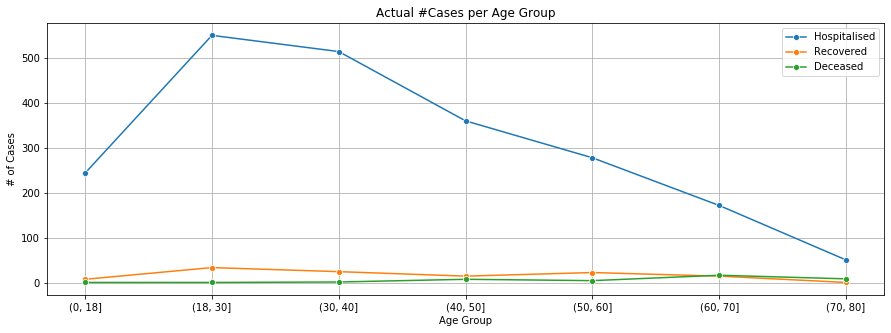

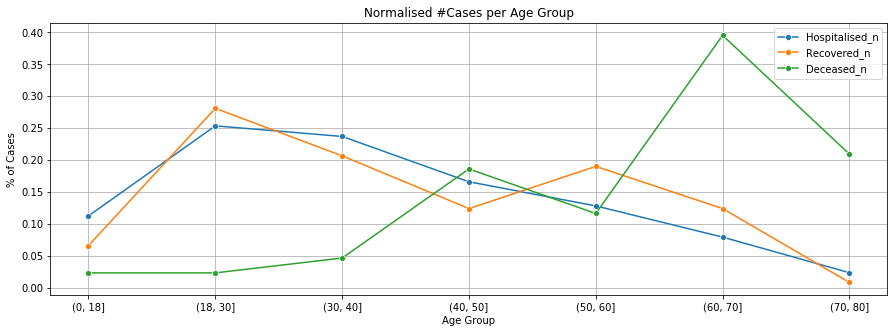

In [65]:
plot3(dg,'Actual #Cases per Age Group')
plot3(dg,'Normalised #Cases per Age Group',normalise=True)

<B> Observations: </B>
1. It is visually evident the total # of confirmed cases goes down with the age. And the # of Deaths increase with the increase in age, which may be infered visually from the drop in # of Recovery with age.
2. It is a point to consider that the # of Deaths spiked for the Age Group (40,50] with a corresponding drop in recovery for the same age group.

In [66]:
df['Age Group'] = pd.cut(df['Age'],[0,18,60,90])

dg = df.groupby('Age Group').agg({'Deceased':'sum','Hospitalized':'sum','Recovered':'sum'}).reset_index()
dg

,Age Group,Deceased,Hospitalized,Recovered
0,"(0, 18]",1,244,8
1,"(18, 60]",16,1702,97
2,"(60, 90]",27,230,18


In [67]:
df_grpd = df.groupby(['Date Announced','Age Group']).agg({'Hospitalized': 'sum', 'Recovered':'sum', 'Deceased':'sum'}).reset_index()

df_grpd['Date Announced'] = pd.to_datetime(df_grpd['Date Announced'],format='%d/%m/%Y')
df_grpd.sort_values(by='Date Announced',inplace=True)

In [68]:
df_grpd['Hospitalized'] = np.where(df_grpd['Hospitalized'].isnull()==True,0,df_grpd['Hospitalized'])
df_grpd['Recovered'] = np.where(df_grpd['Recovered'].isnull()==True,0,df_grpd['Recovered'])
df_grpd['Deceased'] = np.where(df_grpd['Deceased'].isnull()==True,0,df_grpd['Deceased'])

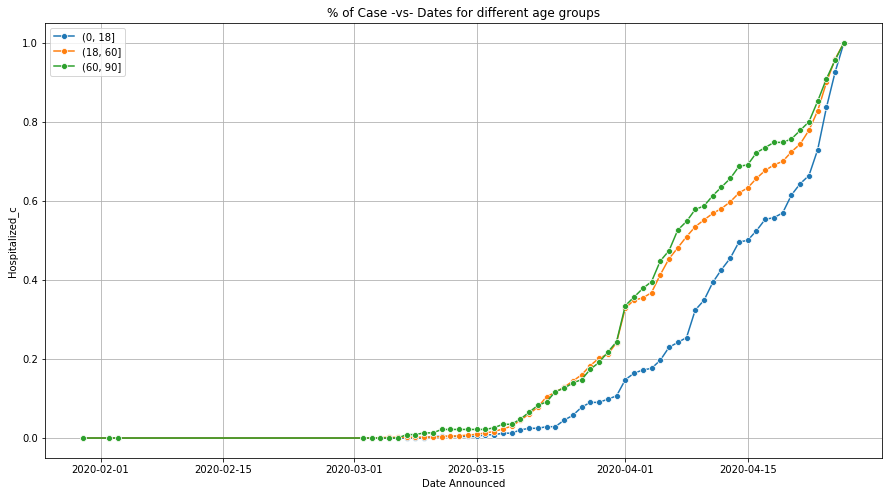

In [70]:
fig,ax = plt.subplots(1,1,figsize=(15,8))
j=0
for i in df_grpd['Age Group'].unique():
    df_slt = df_grpd[df_grpd['Age Group']==i]
    df_slt,h,r,d = AccumulatorNormalised(df_slt)
    sns.lineplot(df_slt['Date Announced'],df_slt['Hospitalized_c']/h,marker='o')
    plt.legend(df_grpd['Age Group'].unique().astype(str))
    j=j+1
    
plt.title('% of Case -vs- Dates for different age groups')    
plt.grid()
plt.show()

<B> Observations: </B><br>
1. After lockdown say 2020-04-01 the detected Propotion patients belonging to age group (60,90] increased indicating spread within families living together.
2. If we look before 2020-03-15, the proportion of confirmed patients belonging to age group (60,90] were higher mostly because of spread within families having infected patients returning to India. 
2. However, younger age group (0,18] remains lowest of proportion due to overall better immunity to the infections.

<B> Statistical Inferences </B>

<B> Question: </B> In the reported confirmed patients <i>below and above age 60</i> infected by COVID-19 virus in India, Is there any difference in the Proportion of Recovery?

<I> Confidence Interval </I>

In [71]:
df['Age Group'] = pd.cut(df['Age'],[0,60,90])
dz = df.groupby(['Age Group']).agg({"Current Status": [lambda x: np.mean(x=="Recovered"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz.reset_index(inplace=True)
dz

,Age Group,Proportion,Total_n
0,"(0, 60]",0.050774,2068
1,"(60, 90]",0.065455,275


In [73]:
p = dz.iloc[0]['Proportion']
n = dz.iloc[0]['Total_n']
se_y = np.sqrt(p * (1 - p) / n)

p = dz.iloc[1]['Proportion']
n = dz.iloc[1]['Total_n']
se_o = np.sqrt(p * (1 - p) / n)

se_diff = np.sqrt(se_o**2 + se_y**2)

y = dz.iloc[0]['Proportion']
o = dz.iloc[1]['Proportion']
d = y-o 
lcb = d - 1.96*se_diff
ucb = d + 1.96*se_diff

print('Sample Proportion of Recovery in (0,60] : {}%'.format(round(y*100,3)))
print('Sample Proportion of Recovery in (60,90] {}%'.format(round(o*100,3)))
print('Sample Difference: {}%'.format(round(d*100,3)))
print('Standard Error: {}'.format(round(se_diff*100,3)))
print('Confidence Interval of difference in proportion of recovery of patients above & below 60yrs: \n({}%, {}%)'.format(round(lcb*100,3),round(ucb*100,3)))

Sample Proportion of Recovery in (0,60] : 5.077%
Sample Proportion of Recovery in (60,90] 6.545%
Sample Difference: -1.468%
Standard Error: 1.568
Confidence Interval of difference in proportion of recovery of patients above & below 60yrs: 
(-4.541%, 1.604%)


<B> Inference: </B><br>
Considering all parameters same if we repeat this statistics procedure we can conclude that 95 times out of 100 times, the difference in the proportion of recovery in confirmed patients below and above age of 60 ranges between (-4.541% to 1.604%) which is also inclusive of Zero suggesting there might be no difference in the Proportion of Recovery.

What does the heavier negative end signify?

<I> Hypothesis Testing </I>

<B>H<sub>0</sub>:</B> p<sub>1</sub>-p<sub>2</sub> = 0 <br>
<B>H<sub>a</sub>:</B> p<sub>1</sub>-p<sub>2</sub> &ne; 0 <br><br>
&emsp;&emsp;&emsp;&emsp;&emsp; where,  p<sub>1</sub> = proportion of recovery of patients below age of 60 who are recovering<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; p<sub>2</sub> = proportion of recovery of patients above age of 60 who are recovering

In [74]:
lt60 = df['Age Group'].unique()[0]
mt60 = df['Age Group'].unique()[2]

In [75]:
p_hat = df[df['Current Status']=='Recovered'].shape[0]/df.shape[0]
p_hat

n1 = df[df['Age Group']==lt60].shape[0]
n2 = df[df['Age Group']==mt60].shape[0]

print(n1*p_hat,n1*(1-p_hat),n2*p_hat,n2*(1-p_hat))


13.42038650460722 2054.5796134953926 1.7846258649743645 273.2153741350256


Since, most of these samples are greater than 10 we can invoke CLT and assume normality. But for n2*p_hat we have some skepticism

In [76]:
import statsmodels.api as sm

dx_y = df.loc[df['Age Group']==lt60, 'Current Status'].replace({"Recovered": 1, "Hospitalized": 0, "Deceased":0})
dx_o = df.loc[df['Age Group']==mt60, 'Current Status'].replace({"Recovered": 1, "Hospitalized": 0, "Deceased":0})
t_stat, p_value, dof = sm.stats.ttest_ind(dx_y, dx_o) # prints test statistic, p-value, degrees of freedom`

In [77]:
print('t statistics: {}'.format(t_stat))
print('p-value: {}'.format(p_value))

t statistics: -1.0253260824239396
p-value: 0.3053152869971153


In [78]:
df['Recovered'] = np.where(df['Current Status']=='Recovered',1,0)

In [79]:
cont_df = pd.crosstab(df['Age Group'],df['Recovered']).iloc[0:]
cont_df.reset_index(inplace=True,drop=True)
cont = np.array(cont_df)

In [80]:
from scipy.stats import chi2_contingency

chi,p,dof,ex = chi2_contingency(cont)
print('t statistics: {}'.format(chi))
print('p-value: {}'.format(p))

t statistics: 0.7772797917923104
p-value: 0.37797436934239415


<B> Inference: </B><br>
From both of the tests: two population test & chi<sup>2</sup> test we have seen that the p-value > &alpha;. So, we do not have suuficient evidence to reject the Null Hypothesis. Therefore, we can infer that there is no difference in Rate of Recovery in the mentioned Age Groups.

<B> Question: </B> In the reported confirmed patients <i>below and above age 60</i> infected by COVID-19 virus in India, Is there any difference in the Proportion of Death?

<I> Confidence Interval </I>

In [81]:
df['Age Group'] = pd.cut(df['Age'],[0,60,90])
dz = df.groupby(['Age Group']).agg({"Current Status": [lambda x: np.mean(x=="Deceased"), np.size]})
dz.columns = ["Proportion", "Total_n"] # The default column names are unclear, so we replace them here
dz.reset_index(inplace=True)
dz

,Age Group,Proportion,Total_n
0,"(0, 60]",0.008221,2068
1,"(60, 90]",0.098182,275


In [83]:
p = dz.iloc[0]['Proportion']
n = dz.iloc[0]['Total_n']
se_y = np.sqrt(p * (1 - p) / n)

p = dz.iloc[1]['Proportion']
n = dz.iloc[1]['Total_n']
se_o = np.sqrt(p * (1 - p) / n)

se_diff = np.sqrt(se_o**2 + se_y**2)

y = dz.iloc[0]['Proportion']
o = dz.iloc[1]['Proportion']
d = y-o
lcb = d - 1.96*se_diff
ucb = d + 1.96*se_diff

print('Sample Proportion of (0,60] Deaths: {}%'.format(round(y*100,3)))
print('Sample Proportion of (60,90] Deaths: {}%'.format(round(o*100,3)))
print('Sample Difference: {}%'.format(round(d*100,3)))
print('Standard Error: {}'.format(round(se_diff*100,3)))
print('Confidence Interval of difference in proportion of death of patients above & below 60yrs: \n({}%, {}%)'.format(round(lcb*100,3),round(ucb*100,3)))

Sample Proportion of (0,60] Deaths: 0.822%
Sample Proportion of (60,90] Deaths: 9.818%
Sample Difference: -8.996%
Standard Error: 1.805
Confidence Interval of difference in proportion of death of patients above & below 60yrs: 
(-12.535%, -5.458%)


<B> Inference: </B><br>
1. Considering all parameters same if we repeat this statistics procedure we can conclude that 95 times out of 100 times, the difference in the rate of deaths in confirmed patients below and above age of 60 ranges between (-12.535% to -5.458%).
2. The interval is entirely negative suggesting that Rate of Deaths in age group (60,90] is much higher.

<I> Hypothesis Testing </I>

<B>H<sub>0</sub>:</B> p<sub>1</sub>-p<sub>2</sub> = 0 <br>
<B>H<sub>a</sub>:</B> p<sub>1</sub>-p<sub>2</sub> &ne; 0 <br><br>
&emsp;&emsp;&emsp;&emsp;&emsp; where,  p<sub>1</sub> = Proportion of Deaths of patients below age of 60<br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; p<sub>2</sub> = Proportion of Deaths of patients above age of 60 who are recovering

In [84]:
lt60 = df['Age Group'].unique()[0]
mt60 = df['Age Group'].unique()[2]

In [85]:
p_hat = df[df['Current Status']=='Deceased'].shape[0]/df.shape[0]
p_hat

n1 = df[df['Age Group']==lt60].shape[0]
n2 = df[df['Age Group']==mt60].shape[0]

print(n1*p_hat,n1*(1-p_hat),n2*p_hat,n2*(1-p_hat))


3.410705962496863 2064.5892940375034 0.4535513248001148 274.5464486751999


Since, most of these samples are lesser than 10 we cannot invoke CLT and assume normality. 

In [86]:
import statsmodels.api as sm

dx_y = df.loc[df['Age Group']==lt60, 'Current Status'].replace({"Recovered": 0, "Hospitalized": 0, "Deceased":1})
dx_o = df.loc[df['Age Group']==mt60, 'Current Status'].replace({"Recovered": 0, "Hospitalized": 0, "Deceased":1})
t_stat, p_value, dof = sm.stats.ttest_ind(dx_y, dx_o) # prints test statistic, p-value, degrees of freedom`

print('t statistics: {}'.format(t_stat))
print('p-value: {}'.format(p_value))

t statistics: -10.563653104578751
p-value: 1.6314519782505304e-25


In [87]:
df['Recovered'] = np.where(df['Current Status']=='Deceased',1,0)

cont_df = pd.crosstab(df['Age Group'],df['Deceased']).iloc[0:]
cont_df.reset_index(inplace=True,drop=True)
cont = np.array(cont_df)

In [88]:
from scipy.stats import chi2_contingency

chi,p,dof,ex = chi2_contingency(cont)
print('t statistics: {}'.format(chi))
print('p-value: {}'.format(p))

t statistics: 101.77825449663591
p-value: 6.2098113129339346e-24


<B> Inference: </B><br>
From chi<sup>2</sup> test we have seen that the p-value << &alpha;. So, we have suuficient evidence to reject the Null Hypothesis. Therefore, we can infer that there is difference in Rate of Death in the mentioned Age Groups. And from above 95% Confidence Interval it is very obvious that the rate of deaths in older age is higher. 

<B> Question: </B> In the reported Male & Female patients infected by COVID-19 virus in India, Is there any difference in the mean age for all the infected patients?

In [128]:
df = ImportData()
df['Age Bracket'] = np.where(df['Age Bracket']=='28-35','32',df['Age Bracket'])
df['Age'] = df['Age Bracket'].astype('float')

Loading Data...

Rows: 27891
Columns: 20


In [129]:
dx = df[(df['Gender'].isnull()==False) & (df['Age'].isnull()==False)]

In [130]:
dx = dx[dx['Current Status']=='Hospitalized']
dx.shape

(2124, 21)

<I>Confidence Interval</I>

In [131]:
x_f = dx[dx['Gender']=='F']['Age'].mean()
std_f = dx[dx['Gender']=='F']['Age'].std()
n_f = dx[dx['Gender']=='F'].shape[0]

x_m = dx[dx['Gender']=='M']['Age'].mean()
std_m = dx[dx['Gender']=='M']['Age'].std()
n_m = dx[dx['Gender']=='M'].shape[0]

print('Sample Mean of Male: {}'.format(x_m))
print('Sample Standard Deviation of Male: {}'.format(std_m))
print('Sample Mean of Female: {}'.format(x_f))
print('Sample Standard Deviation of Female: {}'.format(std_f))

Sample Mean of Male: 38.357708049113235
Sample Standard Deviation of Male: 16.006273895777618
Sample Mean of Female: 36.61823708206687
Sample Standard Deviation of Female: 18.906492694028913


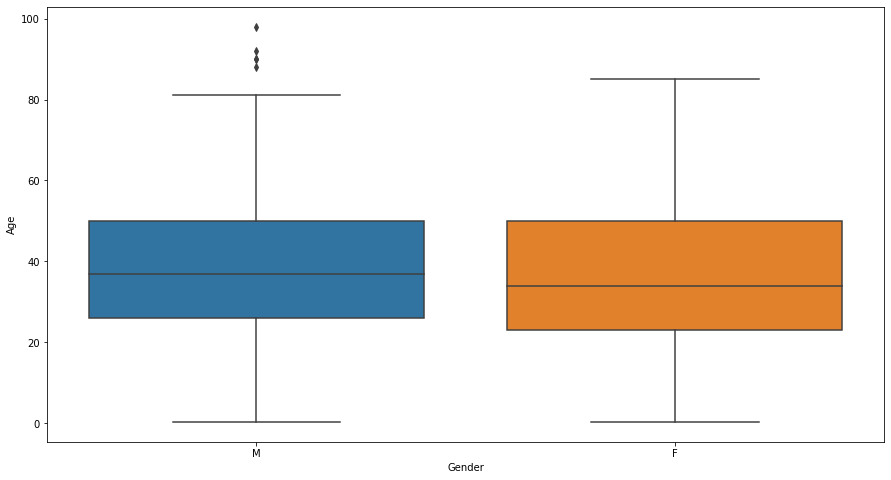

In [132]:
fig = plt.subplots(1,1,figsize=(15,8))
sns.boxplot(dx['Gender'],dx['Age'])
plt.show()

There is a significant difference in the sample standard deviation for Male and Female. Therefore, we will take Unpooled Approach

Male


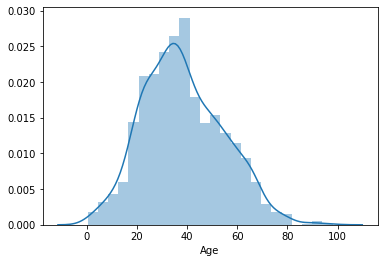

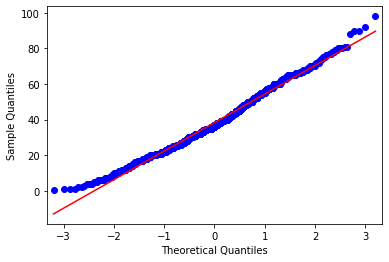

Female


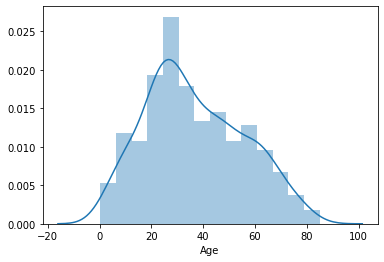

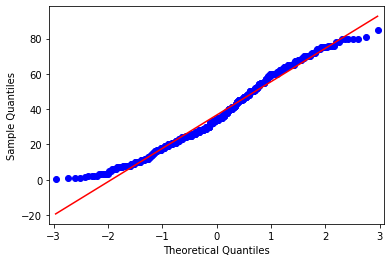

In [135]:
import statsmodels.api as sm 
import pylab as py
m = dx[dx['Gender']=='M']['Age']
f = dx[dx['Gender']=='F']['Age']
print('Male')
sns.distplot(m)
sm.qqplot(m,line='s')
py.show()
plt.show()
print('Female')
sns.distplot(f)
sm.qqplot(f,line='s')
py.show()
plt.show()

In [109]:
x_diff = x_m-x_f
se = np.sqrt((x_m**2/n_m)+(x_f**2/n_f))

lcb = x_diff - 1.962 *se
ucb = x_diff + 1.962 *se

print(lcb,ucb)

-1.6822139750262175 5.161155909118948


<B> Inference </B>:<br> With 95% Confidence, the difference in the mean age between Male and Female patients who are confirmed of infection is estimated to be between -1.682 years and 5.161 years.
But the interval is heavier on positive scale and includes Zero indicating that there be no difference or the mean age in male is higher.

<I> Hypothesis Testing </I>

<B>H<sub>0</sub>:</B> x<sub>m</sub>-x<sub>f</sub> = 0 <br>
<B>H<sub>a</sub>:</B> x<sub>m</sub>-x<sub>f</sub> &ne; 0 <br><br>
&emsp;&emsp;&emsp;&emsp;&emsp; where,  x<sub>m</sub> = Mean Age of Male confirmed patients <br> &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; x<sub>f</sub> = Mean Age of Female confirmed patients

&alpha; = 0.05

In [113]:
import scipy.stats as sm

t,p = sm.ttest_ind(dx[dx['Gender']=='M']['Age'],dx[dx['Gender']=='F']['Age'],equal_var=False)

In [114]:
print('t statistics: {}'.format(t))
print('p value: {}'.format(p))

t statistics: 2.052829060468986
p value: 0.04032599243357058


<B>Inference: </B><br>
Since, p-value < &alpha;, we have some evidence to reject the Null Hypothesis. Therefore, there is a difference between the mean age of Male & Female who are confirmed to be infected by the virus.